<a href="https://colab.research.google.com/github/Bhumika85/bkp/blob/main/CA2_90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

There's a problem with the data in the CSV file. Specifically, it's saying that the columns with index 4 have mixed or inconsistent data types. This can be problematic when reading data into a DataFrame because pandas may not be able to determine the correct data type for that column.

In [ ]:
dtype_dict = {'Height': 'object', 'Weight': 'object'}
df = pd.read_csv('/content/Olympic Game_Analysis_Dataset.xlsx - athlete_events.csv', dtype=dtype_dict)

In [ ]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180,80,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170,60,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185,82,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [ ]:
df.tail()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
149725,75092,Massimo Marino,M,18.0,177,72,Italy,ITA,1972 Summer,1972,Summer,Munich,Cycling,Cycling Men's Sprint,NaN
149726,75092,Massimo Marino,M,22.0,177,72,Italy,ITA,1976 Summer,1976,Summer,Montreal,Cycling,"Cycling Men's 1,000 metres Time Trial",NaN
149727,75093,Osvaldo Mario Fernndez,M,25.0,NaN,NaN,Uruguay,URU,1948 Summer,1948,Summer,London,Water Polo,Water Polo Men's Water Polo,NaN
149728,75094,Ramiro Martn Marino,M,19.0,175,68,Argentina,ARG,2008 Summer,2008,Summer,Beijing,Cycling,Cycling Men's BMX,NaN
149729,75095,Valentina Marino,F,18.0,164,47,Italy,ITA,1996 Summer,1996,Summer,Atlanta,Rhythmic Gymnastics,Rhyt,NaN


In [ ]:
null_values=df.isnull().sum()
print("Null values in the DataFrame: ")
print(null_values)

Null values in the DataFrame: 
ID             0
Name           0
Sex            0
Age         5195
Height     33692
Weight     35281
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     127983
dtype: int64


There are 5195,33692,35281 null values in our data, which means these many players are not selected in olympic games or else they forgot t fill that informations. We can't drop these values as this will provide a valuable information
on why candidates failed to perform in olympics. We can't impute it with mean/median values and it will go against the context of this dataset and it will
show players fake information. Our best way to deal with these null values is to impute it with '0' which shows they don't fill that given information or they dont get medals.

In [ ]:
df = pd.read_csv('/content/Olympic Game_Analysis_Dataset.xlsx - athlete_events.csv')
df['Height'].fillna(0, inplace=True)
df['Weight'].fillna(0, inplace=True)
df['Age'].fillna(0,inplace=True)
df['Medal'].fillna('No Medal', inplace=True)


<ipython-input-5-53cac511083b>:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/Olympic Game_Analysis_Dataset.xlsx - athlete_events.csv')


In [ ]:
null_values=df.isnull().sum()
print("Null values in the DataFrame: ")
print(null_values)

Null values in the DataFrame: 
ID        0
Name      0
Sex       0
Age       0
Height    0
Weight    0
Team      0
NOC       0
Games     0
Year      0
Season    0
City      0
Sport     0
Event     0
Medal     0
dtype: int64


In [ ]:
df.shape

(149730, 15)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149730 entries, 0 to 149729
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      149730 non-null  int64  
 1   Name    149730 non-null  object 
 2   Sex     149730 non-null  object 
 3   Age     149730 non-null  float64
 4   Height  149730 non-null  object 
 5   Weight  149730 non-null  float64
 6   Team    149730 non-null  object 
 7   NOC     149730 non-null  object 
 8   Games   149730 non-null  object 
 9   Year    149730 non-null  int64  
 10  Season  149730 non-null  object 
 11  City    149730 non-null  object 
 12  Sport   149730 non-null  object 
 13  Event   149730 non-null  object 
 14  Medal   149730 non-null  object 
dtypes: float64(2), int64(2), object(11)
memory usage: 17.1+ MB


In [ ]:
df.describe()

,ID,Age,Weight,Year
count,149730.000000,149730.00000,149730.000000,149730.000000
mean,37998.994450,24.66640,54.105924,1978.147960
std,21601.734045,7.81741,32.520495,29.952321
min,1.000000,0.00000,0.000000,1896.000000
25%,19237.000000,21.00000,46.000000,1960.000000
50%,37991.500000,24.00000,64.000000,1988.000000
75%,56866.750000,28.00000,75.000000,2002.000000
max,75095.000000,96.00000,214.000000,2016.000000


In [ ]:
df.duplicated().value_counts()

False    148888
True        842
dtype: int64

In [ ]:
df.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

In [ ]:
df['Sex'].value_counts()

M    109790
F     39940
Name: Sex, dtype: int64

In [ ]:
df['Medal'].value_counts()

No Medal    127983
Gold          7322
Bronze        7239
Silver        7186
Name: Medal, dtype: int64

In [ ]:
df['NOC'].unique()

array(['CHN', 'DEN', 'NED', 'USA', 'FIN', 'NOR', 'ROU', 'EST', 'FRA',
       'MAR', 'ESP', 'EGY', 'IRI', 'BUL', 'ITA', 'CHA', 'AZE', 'SUD',
       'RUS', 'ARG', 'CUB', 'BLR', 'GRE', 'CMR', 'TUR', 'CHI', 'MEX',
       'URS', 'NCA', 'HUN', 'NGR', 'ALG', 'KUW', 'BRN', 'PAK', 'IRQ',
       'UAR', 'LIB', 'QAT', 'MAS', 'GER', 'CAN', 'IRL', 'AUS', 'RSA',
       'ERI', 'TAN', 'JOR', 'TUN', 'LBA', 'BEL', 'DJI', 'PLE', 'COM',
       'KAZ', 'BRU', 'IND', 'KSA', 'SYR', 'MDV', 'ETH', 'UAE', 'YAR',
       'INA', 'PHI', 'SGP', 'UZB', 'KGZ', 'TJK', 'EUN', 'JPN', 'CGO',
       'SUI', 'BRA', 'FRG', 'GDR', 'MON', 'ISR', 'URU', 'SWE', 'ISV',
       'SRI', 'ARM', 'CIV', 'KEN', 'BEN', 'UKR', 'GBR', 'GHA', 'SOM',
       'LAT', 'NIG', 'MLI', 'AFG', 'POL', 'CRC', 'PAN', 'GEO', 'SLO',
       'CRO', 'GUY', 'NZL', 'POR', 'PAR', 'ANG', 'VEN', 'COL', 'BAN',
       'PER', 'ESA', 'PUR', 'UGA', 'HON', 'ECU', 'TKM', 'MRI', 'SEY',
       'TCH', 'LUX', 'MTN', 'CZE', 'SKN', 'TTO', 'DOM', 'VIN', 'JAM',
       'LBR', 'SUR',

In [ ]:
df.nunique()

ID        75095
Name      74659
Sex           2
Age          72
Height      174
Weight      204
Team       1034
NOC         230
Games        51
Year         35
Season        2
City         42
Sport        65
Event       762
Medal         4
dtype: int64

**Univariate Analysis**

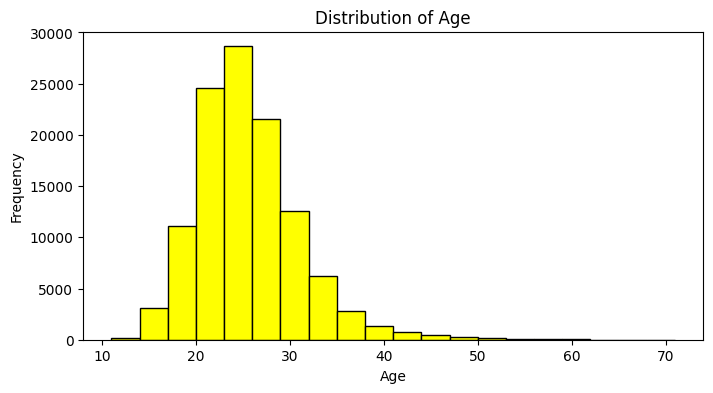

In [ ]:
# Univariate Analysis

# Histogram for Age
plt.figure(figsize=(8, 4))
plt.hist(df['Age'], bins=20, color='yellow', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()


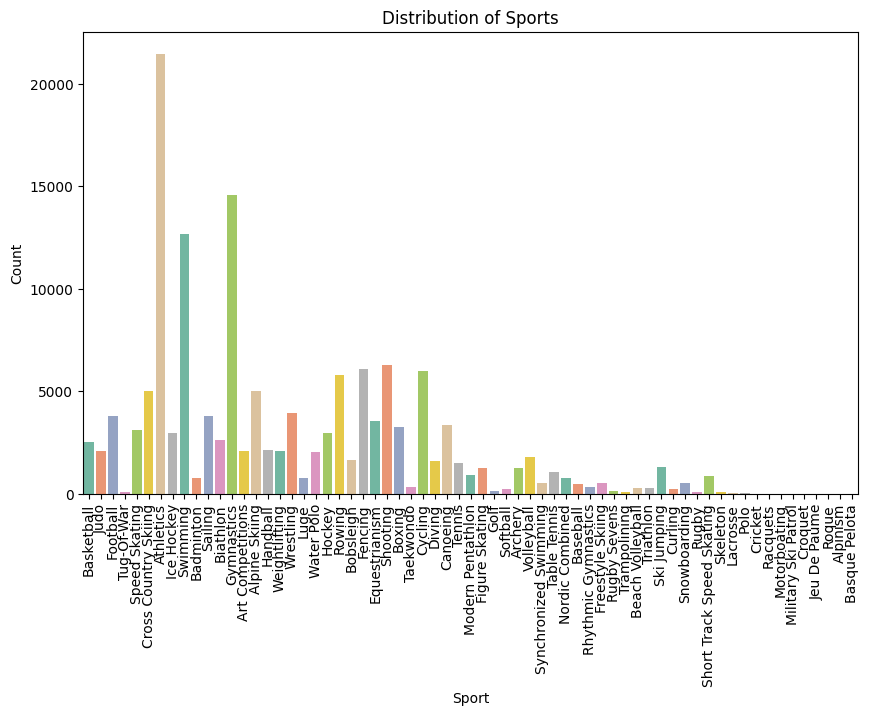

In [ ]:
# Bar Chart for Sport
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Sport', palette='Set2')
plt.xlabel('Sport')
plt.ylabel('Count')
plt.title('Distribution of Sports')
plt.xticks(rotation=90)
plt.show()


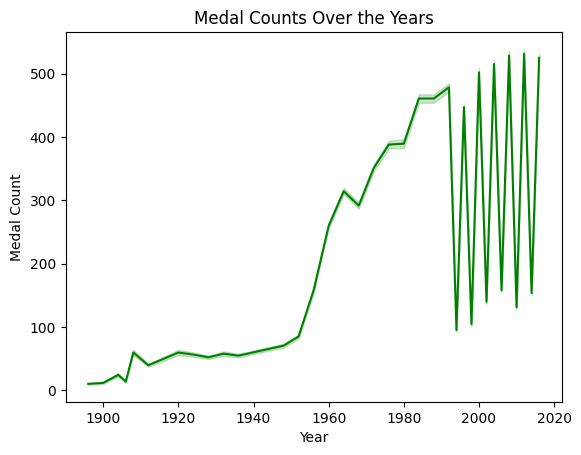

In [ ]:
sns.lineplot(data=df, x='Year',color='green', y=df['Medal'].notnull().astype(int).groupby(df['Year']).cumsum())
plt.xlabel('Year')
plt.ylabel('Medal Count')
plt.title('Medal Counts Over the Years')
plt.show()

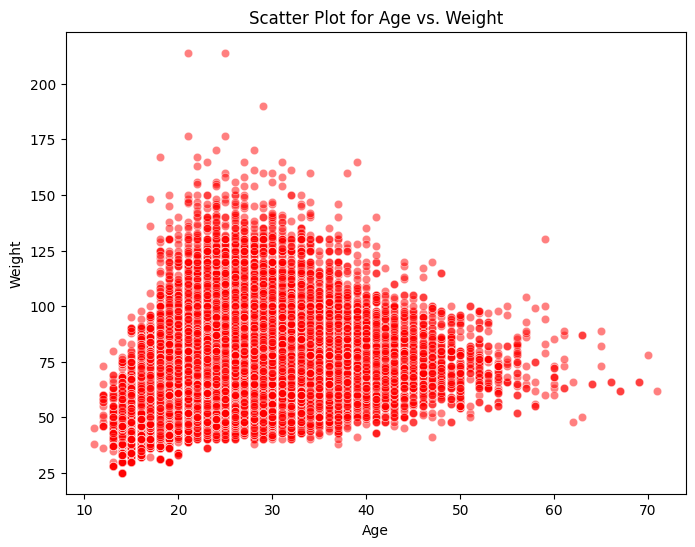

In [ ]:
#Biveriate Analysis
# Create a scatter plot for 'Age' vs. 'Weight'
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Age', y='Weight', color='red', alpha=0.5)
plt.title('Scatter Plot for Age vs. Weight')
plt.show()


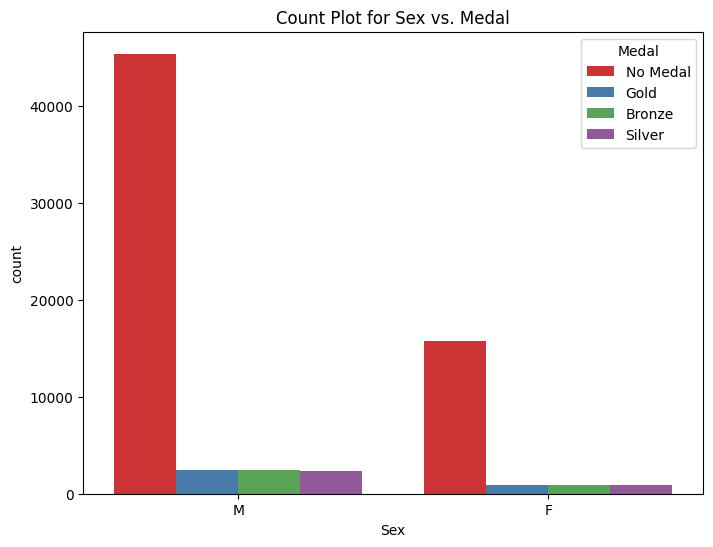

In [ ]:
# Create a count plot for 'Sex' vs. 'Medal'
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Sex', hue='Medal', palette='Set1')
plt.title('Count Plot for Sex vs. Medal')
plt.show()


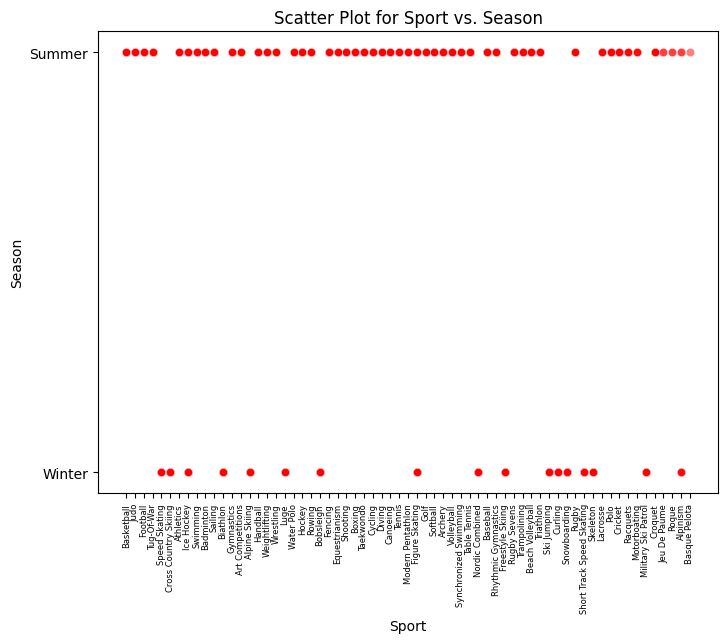

In [ ]:
# Scatter Plot for Sport vs. season
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Sport', y='Season', alpha=0.5,color='red')
plt.xlabel('Sport')
plt.ylabel('Season')
plt.title('Scatter Plot for Sport vs. Season')
plt.xticks(rotation=90,fontsize=6)
plt.show()

#multiveriate analysis
# Create a correlation matrix
correlation_matrix = df[['Age', 'Height', 'Weight', 'Year']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap for Age, Height, Weight, and Year')
plt.show()


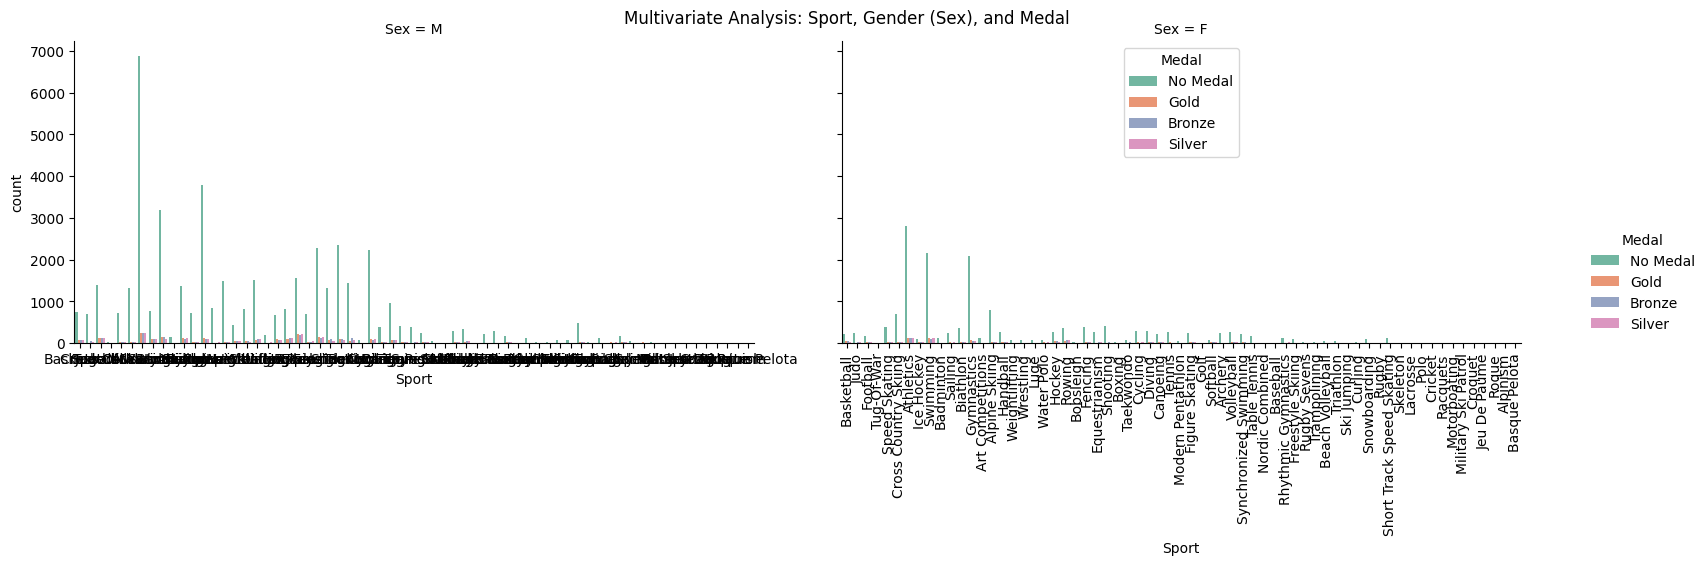

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a categorical plot (catplot) for multivariate analysis
sns.catplot(data=df, x='Sport', hue='Medal', col='Sex', kind='count', palette='Set2',
            height=4, aspect=2, margin_titles=True)

# Set labels and titles
plt.subplots_adjust(top=0.9)
plt.suptitle('Multivariate Analysis: Sport, Gender (Sex), and Medal')
plt.xlabel('Sport')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Medal')

# Show the plot
plt.show()
